In [3]:
# importing basic libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob ## glob is used to retrieve files 

# set seed
np.random.seed(21)

In [4]:
from PIL import Image

directory_benign_train = "C:/Users/samso/Downloads/archive (14)/train/benign"
directory_malignant_train = "C:/Users/samso/Downloads/archive (14)/train/malignant"
directory_benign_test = "C:/Users/samso/Downloads/archive (14)/test/benign"
directory_malignant_test = "C:/Users/samso/Downloads/archive (14)/test/malignant"

## Loading images and converting them to numpy array using their RGB value
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))
# np.asarray converts the objects into array/list

# Loading train images
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

# Loading test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

#img_benign_train
type(img_benign_train)

list

In [5]:
# Converting list to numpy array for faster and more convenient operations going forward

X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

In [6]:
## Creating labels: benign is 0 and malignant is 1

y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [7]:
## Merge data to form complete training and test sets
# axis = 0 means rows

X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape) # one image constitutes to (224, 224, 3) and we have 2637 total images in training set
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

In [9]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


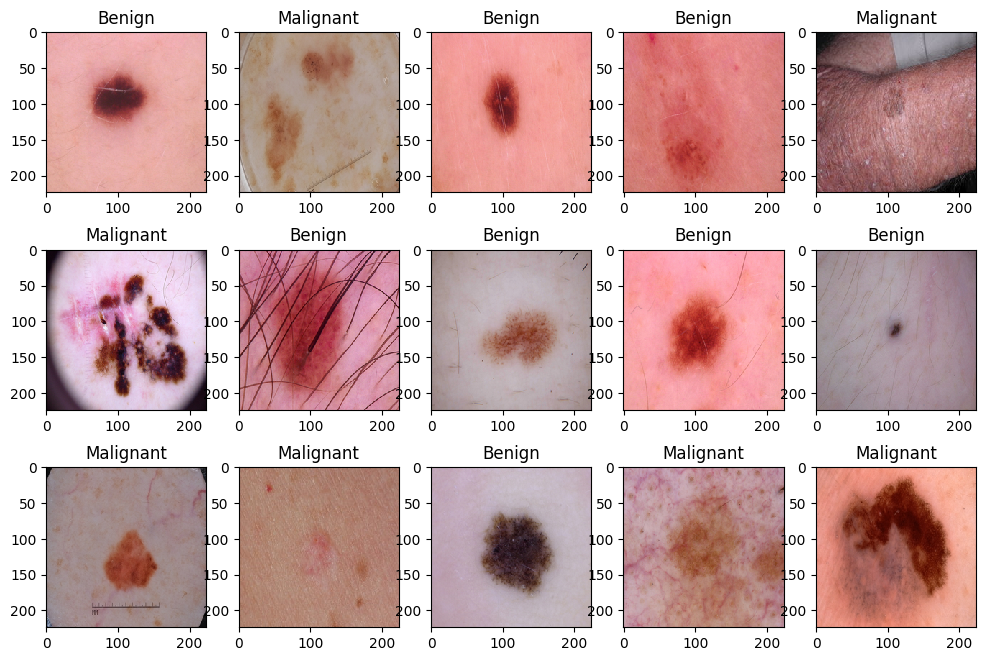

In [10]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
import keras
from keras.utils import to_categorical

# Your other code here

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [12]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [13]:
## Normalize by dividing by RGB value
X_train = X_train/255
X_test = X_test/255

In [14]:
#X_train

In [22]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

def build_cnn_model(input_shape = (224, 224, 3), num_classes=2):
    
    model = Sequential()
    
    # adding 64 filters, each filter has a size of 3*3
    # padding is of 2 types: SAME and VALID (SAME means doing the padding around the image, VALID means no padding)
    # kernel initilizer is for intializing the weights of the network --> the default one is glorot_uniform so don't need to mention parameter
    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    # 25% of the nodes will be dropped out
    model.add(Dropout(0.25)) 
    
    
    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Flatten())
    
    # normal initializer draws samples from a truncated normal distribution centered at 0 and SD = sqrt(2/number of input units)
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()
    
    
    ## OPTIMIZERS are the functions to adjust the weights and minimize the loss
    # Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. 
    # Adam is relatively easy to configure where the default configuration parameters do well on most problems
    # lr is the alpha rate i.e. learning rate
    optimizer= Adam(learning_rate=0.005) 
    
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model   

In [23]:
## MODEL SUMMARY

model_cnn = build_cnn_model()

C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,745,730 (98.21 MB)

 Trainable params: 25,745,730 (98.21 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# ... (previous layers)
model.add(Dense(2, activation='softmax'))  # 2 is the number of classes for binary classification


In [25]:
from keras.callbacks import ReduceLROnPlateau

# Learning rate annealer is used to reduce the learning rate by some percentage after certain number of training iterations/epochs
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',
                                          patience=5,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-7)

# epochs is the number of iterations
# batch_size is the number of images in one epoch
# verbose = 1 shows us the animation of the epoch using progres_bar
history = model_cnn.fit(X_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size = 64, 
                    verbose=1,
                    callbacks=[learning_rate_annealer])


# list all data in history
print(history.history.keys())

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5022 - loss: 3.8167 - val_accuracy: 0.5436 - val_loss: 0.6906 - learning_rate: 0.0050
Epoch 2/50


C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\callbacks\callback_list.py:97: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 904ms/step - accuracy: 0.5368 - loss: 0.6909 - val_accuracy: 0.5436 - val_loss: 0.6881 - learning_rate: 0.0050
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 911ms/step - accuracy: 0.5493 - loss: 0.6885 - val_accuracy: 0.5436 - val_loss: 0.6881 - learning_rate: 0.0050
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 946ms/step - accuracy: 0.5592 - loss: 0.6866 - val_accuracy: 0.5436 - val_loss: 0.6881 - learning_rate: 0.0050
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 946ms/step - accuracy: 0.5452 - loss: 0.6891 - val_accuracy: 0.5436 - val_loss: 0.6882 - learning_rate: 0.0050
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 947ms/step - accuracy: 0.5441 - loss: 0.6894 - val_accuracy: 0.5436 - val_loss: 0.6881 - learning_rate: 0.0050
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 951ms/step - accuracy: 0.5267 - loss: 0.6927 - val_accuracy: 0.5436 - val_loss: 0.6881 - learning_rate: 0.0050
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 949ms/step - accuracy: 0.5369 - loss: 0.6908 - val_

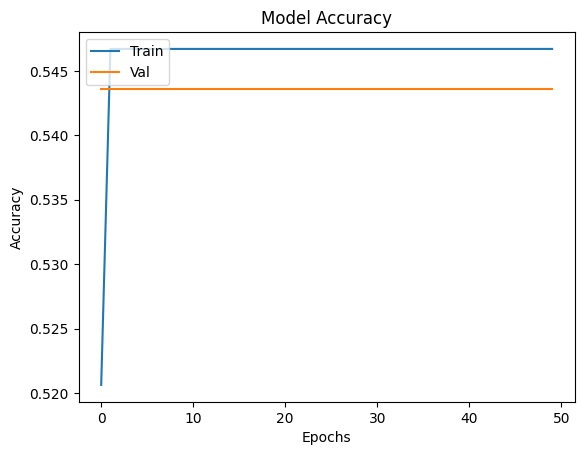

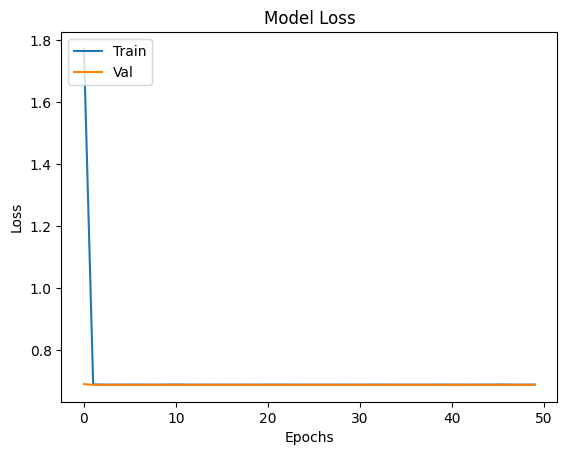

In [26]:
## Summarize model history for accuracy and loss for training and validation

# 1. Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

# Testing model on test data to evaluate
y_pred = np.argmax(model_cnn.predict(X_test), axis=-1)

print(accuracy_score(np.argmax(y_test, axis=1),y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step
0.5454545454545454


In [28]:
y_pred = np.array(y_pred, dtype='uint8')
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

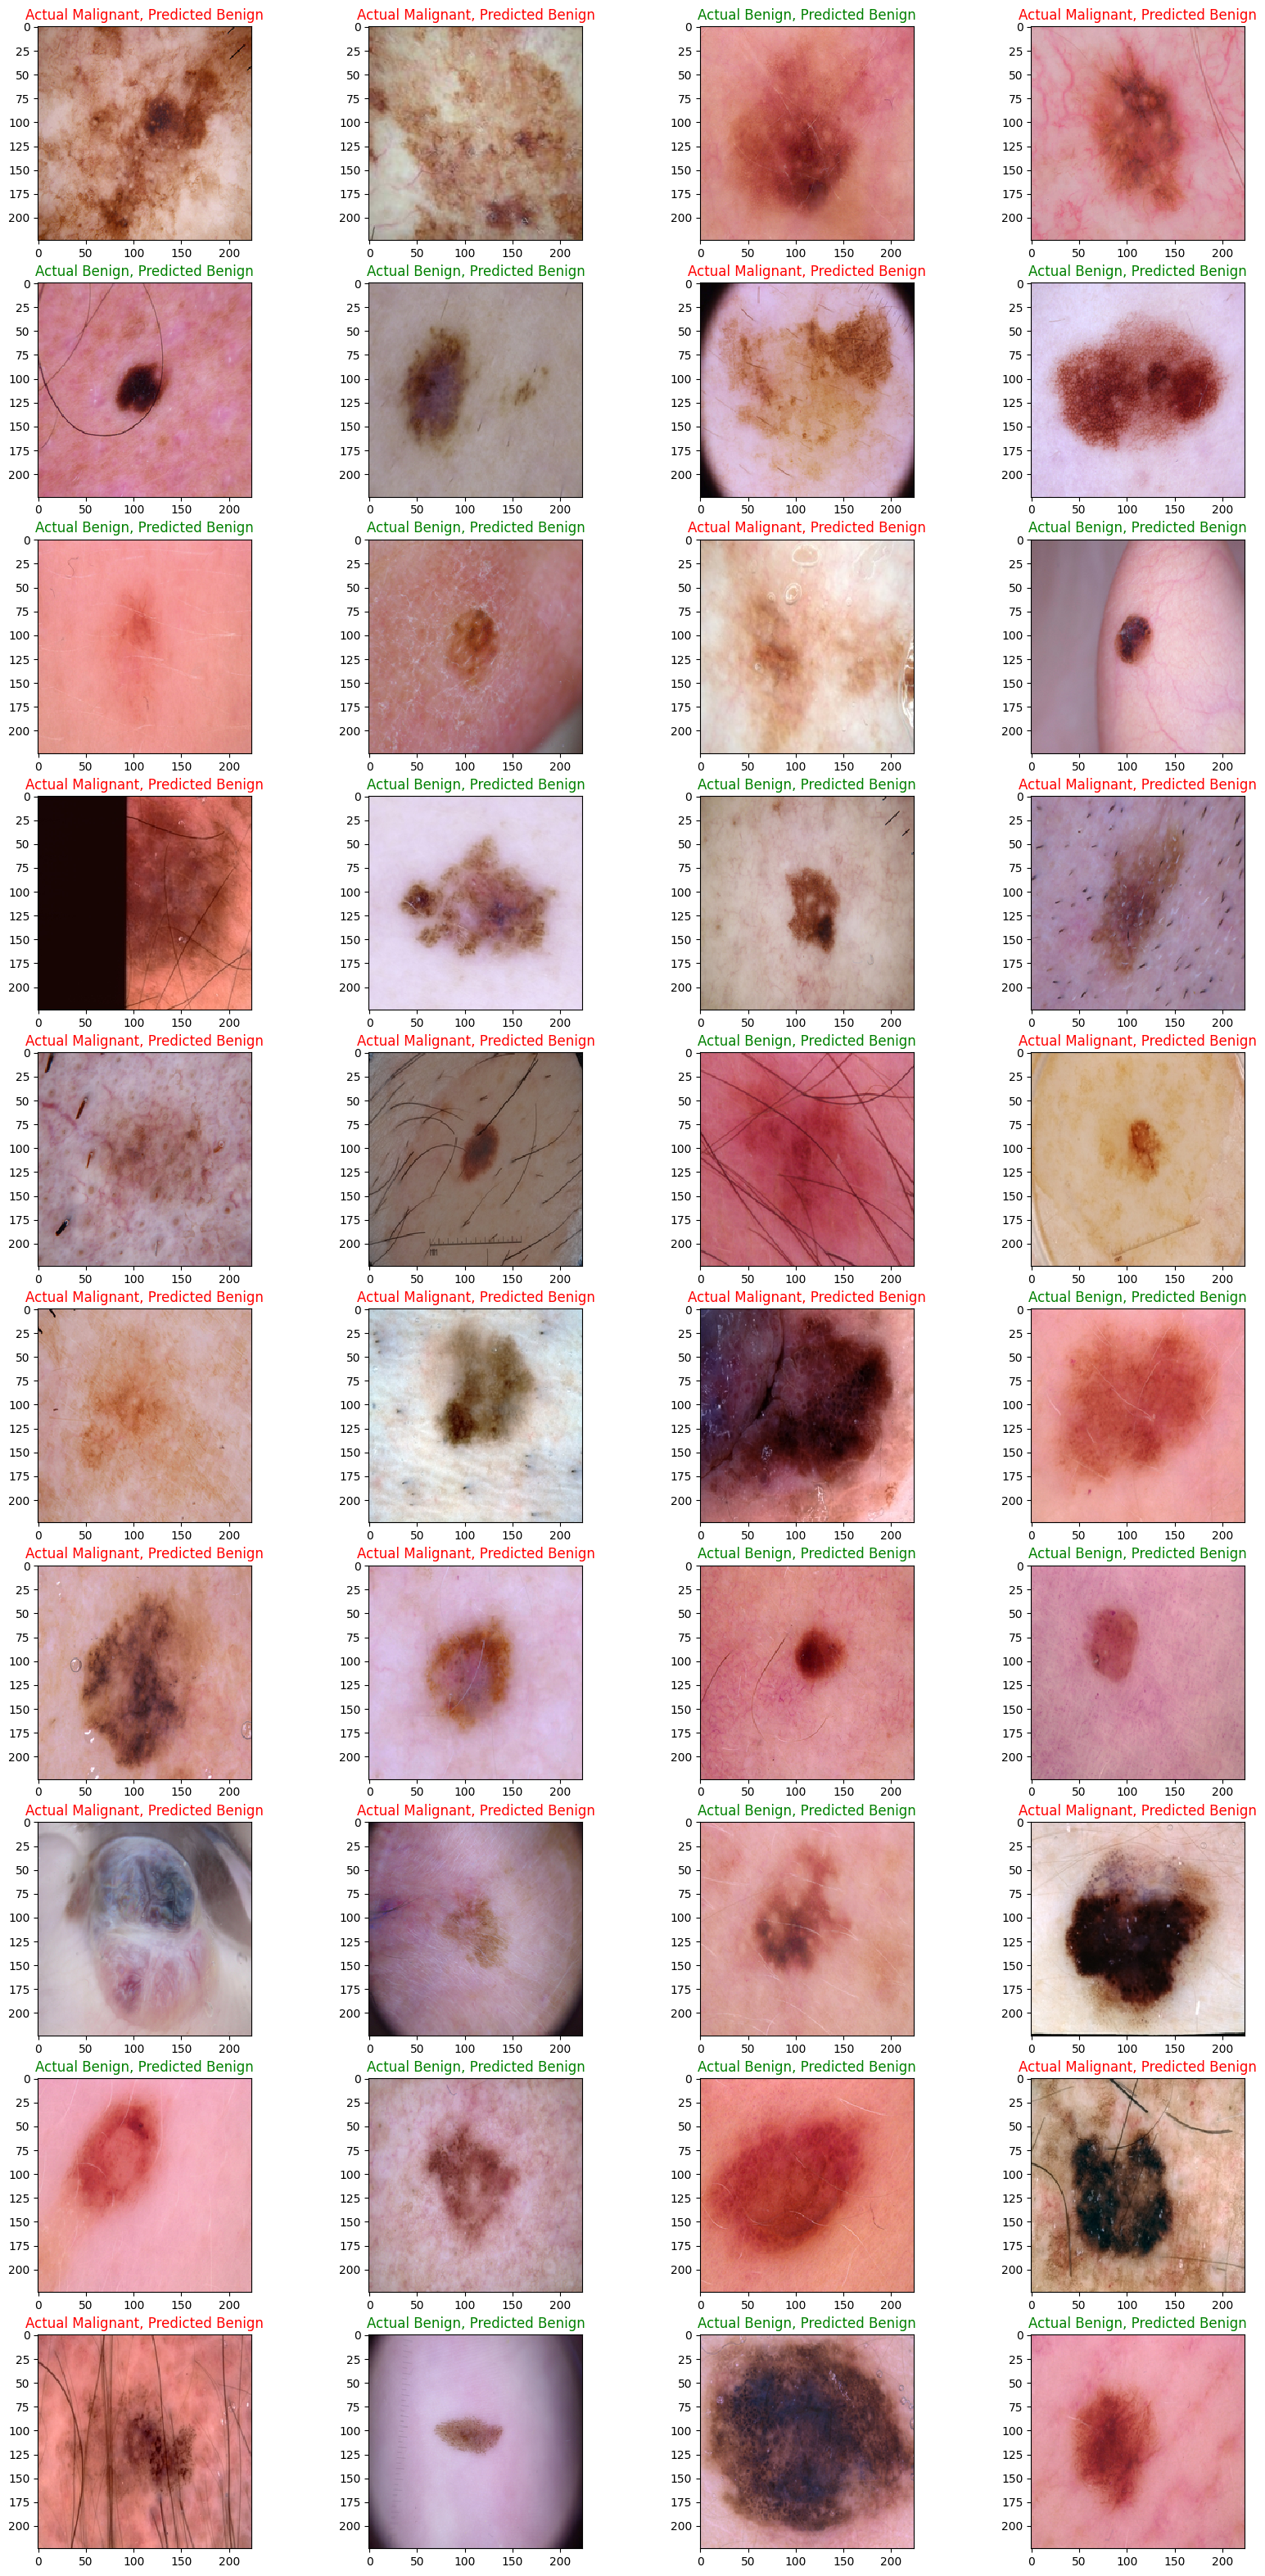

In [29]:
X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

# shuffling data
s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]
y_pred = y_pred[s2]

# plotting
fig = plt.figure(figsize=(20,40))
columns = 4
rows = 10

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_test[i] == 0:
        if y_pred[i] == 0:
            ax.set_title('Actual Benign, Predicted Benign', color='green')
        else:
            ax.set_title('Actual Benign, Predicted Malignant', color='yellow')
    else:
        if y_pred[i] == 1:
            ax.set_title('Actual Malignant, Predicted Malignant', color='green')
        else:
            ax.set_title('Actual Malignant, Predicted Benign', color='red')
    
        
    plt.imshow(X_test[i], interpolation='nearest')
plt.show()